# Kaggle Dataset Download Through Kaggle API

In [ ]:
ls

sample_data/


In [ ]:
!pip install pyspark

     |████████████████████████████████| 212.4MB 67kB/s 
     |████████████████████████████████| 204kB 8.1MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=21095196910124dc43e6ae6691d0ea4374ed20d28626ef494bf64aa6ef83fb27
  Stored in directory: /root/.cache/pip/wheels/40/1b/2c/30f43be2627857ab80062bef1527c0128f7b4070b6b2d02139
Successfully built pyspark


In [ ]:
!pip install pystan fbprophet

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 4.1MB/s 
     |████████████████████████████████| 9.5MB 14.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/My Drive/Colab Notebooks/data/Kaggle

/content/gdrive/My Drive/Colab Notebooks/data/Kaggle


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Colab Notebooks/data/Kaggle"

In [ ]:
!kaggle datasets download -d yamaerenay/spotify-dataset-19212020-160k-tracks

 99% 193M/195M [00:07<00:00, 37.1MB/s]
100% 195M/195M [00:07<00:00, 26.2MB/s]


In [ ]:
! unzip spotify-dataset-19212020-160k-tracks.zip

Archive:  spotify-dataset-19212020-160k-tracks.zip
  inflating: artists.csv             
  inflating: data_by_artist_o.csv    
  inflating: data_by_genres_o.csv    
  inflating: data_by_year_o.csv      
  inflating: data_o.csv              
  inflating: dict_artists.json       
  inflating: tracks.csv              


# **Data Preprocessing**

In [ ]:
# Import the pandas library
import pandas as pd

# Read the data from the dataset
artist_data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/data/Kaggle/data_by_artist_o.csv", dtype='unicode')
dataframe_tracks = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/Kaggle/tracks.csv',parse_dates=['release_date'])

In [ ]:
 artist_data = artist_data[artist_data.astype(str)['genres'] != '[]']

In [ ]:
print("After Shape:",artist_data.shape)

After Shape: (18823, 16)


In [ ]:
dataframe_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586672 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586672 non-null  int64         
 3   duration_ms       586672 non-null  int64         
 4   explicit          586672 non-null  int64         
 5   artists           586672 non-null  object        
 6   id_artists        586672 non-null  object        
 7   release_date      586672 non-null  datetime64[ns]
 8   danceability      586672 non-null  float64       
 9   energy            586672 non-null  float64       
 10  key               586672 non-null  int64         
 11  loudness          586672 non-null  float64       
 12  mode              586672 non-null  int64         
 13  speechiness       586672 non-null  float64       
 14  acou

In [ ]:
import numpy as np

numerical_feature = dataframe_tracks.dtypes== np.int64
numerical_columns = dataframe_tracks.columns[numerical_feature].tolist()
numerical_columns

['popularity', 'duration_ms', 'explicit', 'key', 'mode', 'time_signature']

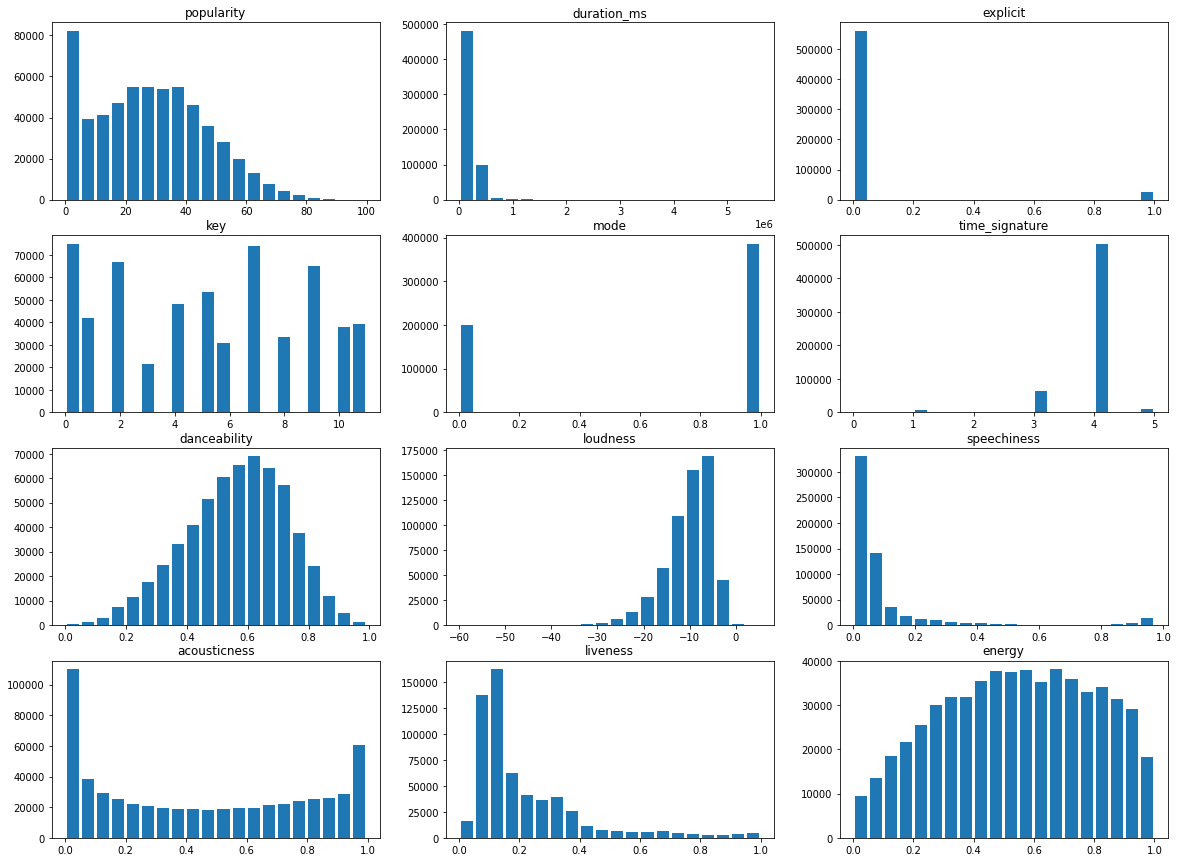

In [ ]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

numerical_feature = dataframe_tracks.dtypes== np.int64
numerical_columns = ['popularity', 'duration_ms', 'explicit', 'key', 'mode', 'time_signature','danceability','loudness','speechiness','acousticness','liveness','energy']

fig, axs = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in numerical_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(dataframe_tracks[num_column], bins=20, rwidth=0.8)
    
    axs[trace_x, trace_y].set_title(num_column)
    

    counter += 1


plt.show()

# Time Series focasting of dancebility feature By using  facebook prophet and ARIMA Model

**Focasting of Dancebility By Facebook prophet**

In [ ]:
import warnings; 
warnings.simplefilter('ignore')

In [ ]:

df= dataframe_tracks.copy()
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (586601, 20)


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [ ]:
split_date1 = pd.datetime(2010,1,1)
split_date2 = pd.datetime(2021,1,1)

df = df[(df['release_date'] >=split_date1 ) & (df['release_date'] <= split_date2)]

In [ ]:
df = df[['release_date','danceability','tempo']]
df.release_date = pd.to_datetime(df.release_date, format='%Y-%m-%d')
df.sort_values(by=['release_date'],inplace=True)

In [ ]:
df.danceability = df.groupby(df['release_date'])['danceability'].transform('mean')
df.tempo= df.groupby(df['release_date'])['tempo'].transform('mean')
df.drop_duplicates(subset=['release_date'],inplace=True)
df

,release_date,danceability,tempo
237405,2010-01-01,0.592037,121.617097
574959,2010-01-02,0.482250,117.507000
74271,2010-01-03,0.441750,102.773897
334604,2010-01-04,0.664333,119.291333
334451,2010-01-05,0.621672,117.521781
...,...,...,...
501128,2020-12-28,0.599891,133.719406
246490,2020-12-29,0.661392,125.476961
118837,2020-12-30,0.502373,130.898582
416537,2020-12-31,0.667096,121.994356


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
phropetFocastDf = df.copy()

In [ ]:
phropetFocastDf.head(5)

,release_date,danceability,tempo
237405,2010-01-01,0.592037,121.617097
574959,2010-01-02,0.482250,117.507000
74271,2010-01-03,0.441750,102.773897
334604,2010-01-04,0.664333,119.291333
334451,2010-01-05,0.621672,117.521781


In [ ]:
phropetFocastDf['ds'] = pd.DatetimeIndex(df['release_date'])

In [ ]:
phropetFocastDf.head(5)

,release_date,danceability,tempo,ds
237405,2010-01-01,0.592037,121.617097,2010-01-01
574959,2010-01-02,0.482250,117.507000,2010-01-02
74271,2010-01-03,0.441750,102.773897,2010-01-03
334604,2010-01-04,0.664333,119.291333,2010-01-04
334451,2010-01-05,0.621672,117.521781,2010-01-05


In [ ]:
phropetFocastDf.drop(['tempo', 'release_date'], axis=1, inplace=True)
phropetFocastDf.columns = ['y', 'ds']

In [ ]:
phropetFocastDf.head()

,y,ds
237405,0.592037,2010-01-01
574959,0.482250,2010-01-02
74271,0.441750,2010-01-03
334604,0.664333,2010-01-04
334451,0.621672,2010-01-05


In [ ]:
print(phropetFocastDf.shape)

(3962, 2)


In [ ]:
phropetFocastDf.tail(2)

,y,ds
416537,0.667096,2020-12-31
264960,0.638338,2021-01-01


In [ ]:
phropetFocastDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3962 entries, 237405 to 264960
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       3962 non-null   float64       
 1   ds      3962 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 92.9 KB


In [ ]:
from fbprophet import Prophet

m = Prophet(interval_width=0.95)
model = m.fit(phropetFocastDf)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,0.602692,0.434835,0.729377,0.602692,0.602692,-0.011492,-0.011492,-0.011492,0.001204,0.001204,0.001204,-0.012697,-0.012697,-0.012697,0.0,0.0,0.0,0.591200
1,2010-01-02,0.602688,0.456715,0.731348,0.602688,0.602688,-0.009424,-0.009424,-0.009424,0.004158,0.004158,0.004158,-0.013582,-0.013582,-0.013582,0.0,0.0,0.0,0.593264
2,2010-01-03,0.602684,0.458018,0.740142,0.602684,0.602684,-0.009933,-0.009933,-0.009933,0.004468,0.004468,0.004468,-0.014401,-0.014401,-0.014401,0.0,0.0,0.0,0.592751
3,2010-01-04,0.602680,0.462984,0.728000,0.602680,0.602680,-0.011832,-0.011832,-0.011832,0.003313,0.003313,0.003313,-0.015144,-0.015144,-0.015144,0.0,0.0,0.0,0.590848
4,2010-01-05,0.602676,0.443135,0.729197,0.602676,0.602676,-0.017262,-0.017262,-0.017262,-0.001458,-0.001458,-0.001458,-0.015804,-0.015804,-0.015804,0.0,0.0,0.0,0.585413


In [ ]:
print(forecast.shape)

(4062, 19)


In [ ]:
forecast.tail(100)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3962,2021-01-02,0.666423,0.519294,0.792697,0.666423,0.666423,-0.009635,-0.009635,-0.009635,0.004158,0.004158,0.004158,-0.013793,-0.013793,-0.013793,0.0,0.0,0.0,0.656787
3963,2021-01-03,0.666452,0.527133,0.806594,0.666452,0.666452,-0.010126,-0.010126,-0.010126,0.004468,0.004468,0.004468,-0.014594,-0.014594,-0.014594,0.0,0.0,0.0,0.656325
3964,2021-01-04,0.666481,0.508052,0.784102,0.666481,0.666481,-0.012005,-0.012005,-0.012005,0.003313,0.003313,0.003313,-0.015318,-0.015318,-0.015318,0.0,0.0,0.0,0.654476
3965,2021-01-05,0.666510,0.522763,0.789098,0.666510,0.666510,-0.017413,-0.017413,-0.017413,-0.001458,-0.001458,-0.001458,-0.015955,-0.015955,-0.015955,0.0,0.0,0.0,0.649096
3966,2021-01-06,0.666539,0.481258,0.780361,0.666539,0.666539,-0.031101,-0.031101,-0.031101,-0.014598,-0.014598,-0.014598,-0.016502,-0.016502,-0.016502,0.0,0.0,0.0,0.635438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057,2021-04-07,0.669177,0.513822,0.795088,0.668987,0.669336,-0.011552,-0.011552,-0.011552,-0.014598,-0.014598,-0.014598,0.003046,0.003046,0.003046,0.0,0.0,0.0,0.657624
4058,2021-04-08,0.669206,0.531126,0.807864,0.669014,0.669368,0.006089,0.006089,0.006089,0.002914,0.002914,0.002914,0.003175,0.003175,0.003175,0.0,0.0,0.0,0.675295
4059,2021-04-09,0.669235,0.534005,0.811926,0.669041,0.669401,0.004525,0.004525,0.004525,0.001204,0.001204,0.001204,0.003321,0.003321,0.003321,0.0,0.0,0.0,0.673760
4060,2021-04-10,0.669264,0.532671,0.821230,0.669068,0.669433,0.007637,0.007637,0.007637,0.004158,0.004158,0.004158,0.003479,0.003479,0.003479,0.0,0.0,0.0,0.676900


In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,2010-01-01,0.591200
1,2010-01-02,0.593264
2,2010-01-03,0.592751
3,2010-01-04,0.590848
4,2010-01-05,0.585413
...,...,...
4057,2021-04-07,0.657624
4058,2021-04-08,0.675295
4059,2021-04-09,0.673760
4060,2021-04-10,0.676900


In [ ]:
forecast[['ds','yhat']].tail(100)

,ds,yhat
3962,2021-01-02,0.656787
3963,2021-01-03,0.656325
3964,2021-01-04,0.654476
3965,2021-01-05,0.649096
3966,2021-01-06,0.635438
...,...,...
4057,2021-04-07,0.657624
4058,2021-04-08,0.675295
4059,2021-04-09,0.673760
4060,2021-04-10,0.676900


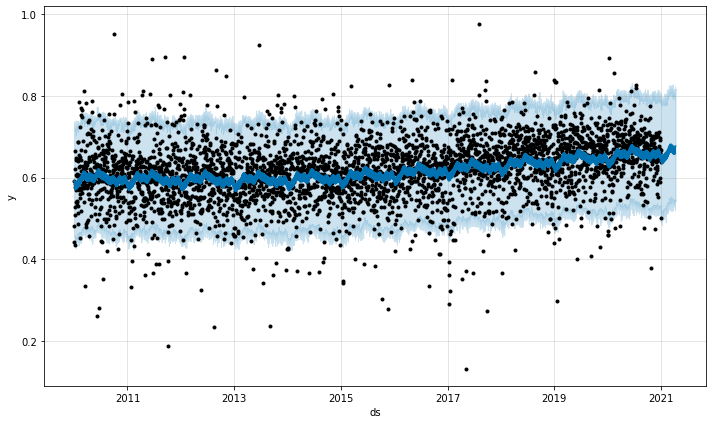

In [ ]:
plot1 = m.plot(forecast)

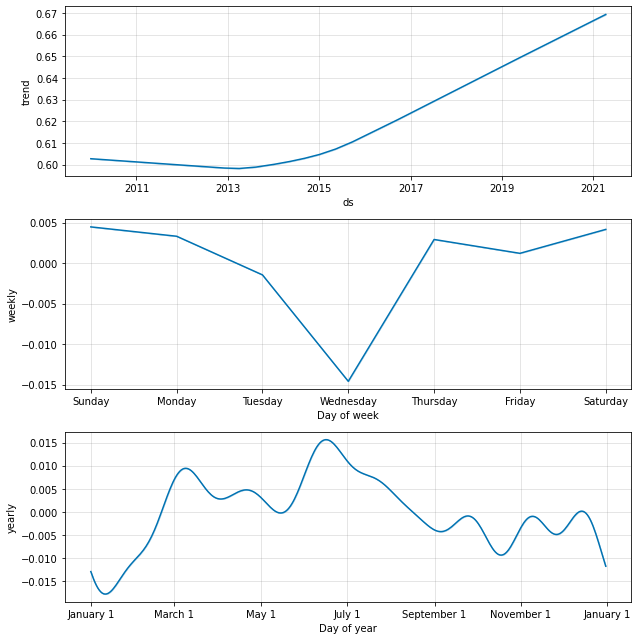

In [ ]:
plt2 = m.plot_components(forecast)

In [ ]:
forecast['yhat'].mean()

0.620362986895958

**Focasting of Dancebility By ARIMA**

In [ ]:
df.set_index('release_date',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3962 entries, 2010-01-01 to 2021-01-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   danceability  3962 non-null   float64
 1   tempo         3962 non-null   float64
dtypes: float64(2)
memory usage: 92.9 KB


In [ ]:
print('Shape of data',df.shape)

Shape of data (3962, 2)


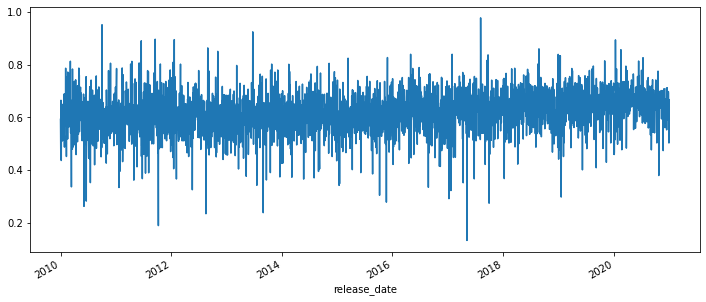

In [ ]:
df['danceability'].plot(figsize=(12,5))

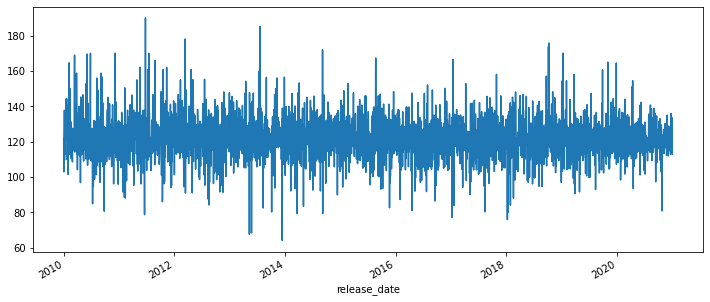

In [ ]:
df['tempo'].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(df['danceability'])

1. ADF :  -5.678523302026007
2. P-Value :  8.592894407507869e-07
3. Num Of Lags :  28
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 3933
5. Critical Values :
	 1% :  -3.4320137612824717
	 5% :  -2.8622751586881257
	 10% :  -2.567161333387508


In [ ]:
adf_test(df['tempo'])

1. ADF :  -42.43366179143054
2. P-Value :  0.0
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 3960
5. Critical Values :
	 1% :  -3.4320024100894573
	 5% :  -2.862270144380109
	 10% :  -2.5671586639756145


In [ ]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(df['danceability'], suppress_warnings=True) 
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3962
Model:               SARIMAX(4, 1, 1)   Log Likelihood                4799.122
Date:                Fri, 11 Jun 2021   AIC                          -9584.244
Time:                        15:55:15   BIC                          -9540.254
Sample:                             0   HQIC                         -9568.643
                               - 3962                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.533e-06   1.22e-05      0.784      0.433   -1.43e-05    3.34e-05
ar.L1          0.0419      0.015      2.858      0.004       0.013       0.071
ar.L2         -0.0299      0.017     -1.717      0.086      -0.064       0.004
ar.L3         -0.0024      0.016     -0.149      0.882      -0.034       0.029
ar.L4          0.0043      0.016      0.272      0.786      -0.027       0.035
ma.L1         -0.9899      0.003   -386.426      0.000      -0.995      -0.985
sigma2         0.0051   7.48e-05     68.839      0.000       0.005       0.005
===================================================================================
Ljung-Box (L1) (Q):                   1.87   Jarque-Bera (JB):              1842.87
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(3962, 2)
(3932, 2) (30, 2)
danceability      0.629719
tempo           120.303539
Name: 2020-12-03 00:00:00, dtype: float64 danceability      0.638338
tempo           112.767842
Name: 2021-01-01 00:00:00, dtype: float64


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(train['danceability'],order=(4, 1, 1))
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.danceability   No. Observations:                 3931
Model:                 ARIMA(4, 1, 1)   Log Likelihood                4757.285
Method:                       css-mle   S.D. of innovations              0.072
Date:                Fri, 11 Jun 2021   AIC                          -9500.571
Time:                        15:59:46   BIC                          -9456.634
Sample:                             1   HQIC                         -9484.983
                                                                              
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.569e-05   9.35e-06      1.679      0.093   -2.63e-06     3.4e-05
ar.L1.D.danceability     0.0243      0.016      1.492      0.136      -0.008       0.056
ar.L2.D.danceability    -0.0239      0.016     -1.469      0.142      -0.056       0.008
ar.L3.D.danceability    -0.0010      0.016     -0.062      0.950      -0.033       0.031
ar.L4.D.danceability    -0.0028      0.016     -0.170      0.865      -0.035       0.029
ma.L1.D.danceability    -0.9921      0.004   -277.001      0.000      -0.999      -0.985
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.6252           -3.2730j            4.1957           -0.1424
AR.2            2.6252           +3.2730j            4.1957            0.1424
AR.3           -2.8076           -3.5514j            4.5272           -0.3565
AR.4           -2.8076           +3.5514j            4.5272            0.3565
MA.1            1.0080           +0.0000j            1.0080            0.0000
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


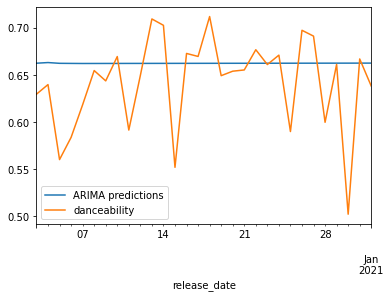

In [ ]:
start=len(train)
end=len(train)+len(test)-1

index_future_dates=pd.date_range(start='2020-12-03',end='2021-01-01')
pred1=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred1.index=index_future_dates
pred1.plot(legend=True)
test['danceability'].plot(legend=True)

In [ ]:
print(pred1)

2020-12-03    0.662583
2020-12-04    0.663285
2020-12-05    0.662470
2020-12-06    0.662376
2020-12-07    0.662299
2020-12-08    0.662314
2020-12-09    0.662334
2020-12-10    0.662350
2020-12-11    0.662366
2020-12-12    0.662382
2020-12-13    0.662398
2020-12-14    0.662413
2020-12-15    0.662429
2020-12-16    0.662445
2020-12-17    0.662460
2020-12-18    0.662476
2020-12-19    0.662492
2020-12-20    0.662507
2020-12-21    0.662523
2020-12-22    0.662539
2020-12-23    0.662554
2020-12-24    0.662570
2020-12-25    0.662586
2020-12-26    0.662602
2020-12-27    0.662617
2020-12-28    0.662633
2020-12-29    0.662649
2020-12-30    0.662664
2020-12-31    0.662680
2021-01-01    0.662696
Freq: D, Name: ARIMA predictions, dtype: float64


In [ ]:
pred1.mean

<bound method Series.mean of 2020-12-03    0.662583
2020-12-04    0.663285
2020-12-05    0.662470
2020-12-06    0.662376
2020-12-07    0.662299
2020-12-08    0.662314
2020-12-09    0.662334
2020-12-10    0.662350
2020-12-11    0.662366
2020-12-12    0.662382
2020-12-13    0.662398
2020-12-14    0.662413
2020-12-15    0.662429
2020-12-16    0.662445
2020-12-17    0.662460
2020-12-18    0.662476
2020-12-19    0.662492
2020-12-20    0.662507
2020-12-21    0.662523
2020-12-22    0.662539
2020-12-23    0.662554
2020-12-24    0.662570
2020-12-25    0.662586
2020-12-26    0.662602
2020-12-27    0.662617
2020-12-28    0.662633
2020-12-29    0.662649
2020-12-30    0.662664
2020-12-31    0.662680
2021-01-01    0.662696
Freq: D, Name: ARIMA predictions, dtype: float64>

In [ ]:
test['danceability'].mean()

0.6425765622746636

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=sqrt(mean_squared_error(pred1,test['danceability']))
print(rmse)

0.05244865888560497


In [ ]:
model2=ARIMA(df['danceability'],order=(4, 1, 1))
model2=model2.fit()
df.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,danceability,tempo
release_date,,
2020-12-28,0.599891,133.719406
2020-12-29,0.661392,125.476961
2020-12-30,0.502373,130.898582
2020-12-31,0.667096,121.994356
2021-01-01,0.638338,112.767842


In [ ]:
index_future_dates=pd.date_range(start='2020-12-31',end='2021-4-30') 
pred2=model2.predict(start=len(df),end=len(df)+120,typ='levels').rename('ARIMA Predictions')
pred2.index=index_future_dates
print(pred2)

2020-12-31    0.657071
2021-01-01    0.658810
2021-01-02    0.658239
2021-01-03    0.658319
2021-01-04    0.658328
                ...   
2021-04-26    0.659952
2021-04-27    0.659966
2021-04-28    0.659981
2021-04-29    0.659995
2021-04-30    0.660010
Freq: D, Name: ARIMA Predictions, Length: 121, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


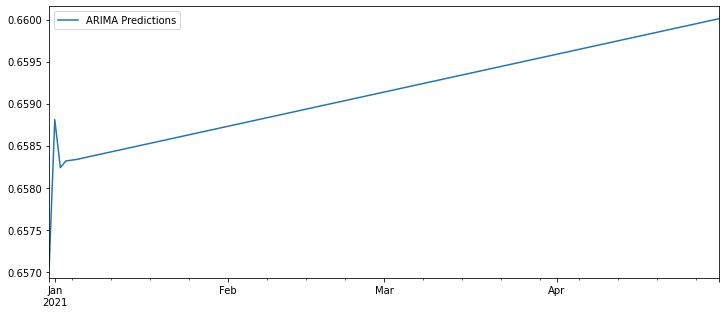

In [ ]:
pred2.plot(figsize=(12,5),legend=True)

# Time Series Analysis

In [ ]:
dataframe_tracks.drop_duplicates(subset=['name'],inplace=True)

In [ ]:
dataframe_tracks.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [ ]:
data = dataframe_tracks[['release_date','energy','loudness','speechiness','acousticness','instrumentalness','liveness','tempo']]
data.sort_values(by=['release_date'],inplace=True)
data.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,release_date,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
478627,1900-01-01,0.791,-4.895,0.0295,0.139,0.000002,0.161,141.999
132351,1922-01-01,0.375,-6.263,0.0559,0.968,0.095500,0.140,180.054
132339,1922-01-01,0.750,-4.930,0.0861,0.947,0.850000,0.137,119.113
93,1922-01-01,0.323,-12.780,0.0331,0.985,0.039500,0.357,125.653
95,1922-01-01,0.301,-14.070,0.1050,0.987,0.000000,0.277,129.153


In [ ]:

data.energy = data.groupby(data.release_date)['energy'].transform('mean')
data.loudness= data.groupby(data.release_date)['loudness'].transform('mean')
data.speechiness= data.groupby(data.release_date)['speechiness'].transform('mean')
data.acousticness= data.groupby(data.release_date)['acousticness'].transform('mean')
data.instrumentalness= data.groupby(data.release_date)['instrumentalness'].transform('mean')
data.liveness= data.groupby(data.release_date)['liveness'].transform('mean')
data.tempo= data.groupby(data.release_date)['tempo'].transform('mean')
data.drop_duplicates(subset=['release_date'],inplace=True)
#frame.columns=['mean_danceability','mean_popularity','release_year','energy','mean_valence']
data.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,release_date,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
478627,1900-01-01,0.791000,-4.895000,0.029500,0.139000,0.000002,0.161000,141.999000
132351,1922-01-01,0.402194,-9.149439,0.073040,0.953835,0.332005,0.226767,119.683576
99,1922-01-06,0.223429,-19.192714,0.955571,0.678000,0.000000,0.154571,83.690000
0,1922-02-22,0.415332,-16.086833,0.249783,0.489667,0.815000,0.154917,92.420000
125,1922-03-21,0.212700,-22.733526,0.100768,0.992684,0.540036,0.290911,117.324789


In [ ]:
nframe = data.copy()
nframe.release_date = nframe.release_date.dt.year
nframe.energy = nframe.groupby(nframe.release_date)['energy'].transform('mean')
nframe.loudness= nframe.groupby(nframe.release_date)['loudness'].transform('mean')
nframe.speechiness= nframe.groupby(nframe.release_date)['speechiness'].transform('mean')
nframe.acousticness= nframe.groupby(nframe.release_date)['acousticness'].transform('mean')
nframe.instrumentalness= nframe.groupby(nframe.release_date)['instrumentalness'].transform('mean')
nframe.liveness= nframe.groupby(nframe.release_date)['liveness'].transform('mean')
nframe.tempo= nframe.groupby(nframe.release_date)['tempo'].transform('mean')
nframe.drop_duplicates(subset=['release_date'],inplace=True)
#frame.columns=['mean_danceability','mean_popularity','release_year','energy','mean_valence']
nframe.head(5)


,release_date,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
478627,1900,0.791000,-4.895000,0.029500,0.139000,0.000002,0.161000,141.999000
132351,1922,0.262624,-17.973435,0.350922,0.824913,0.413222,0.227387,100.962282
132441,1923,0.401259,-15.046069,0.153321,0.681716,0.574494,0.257605,105.243024
116153,1924,0.368655,-13.939227,0.252408,0.846599,0.467642,0.201723,105.966880
132756,1925,0.384389,-15.368572,0.213070,0.787769,0.506010,0.319311,113.411867


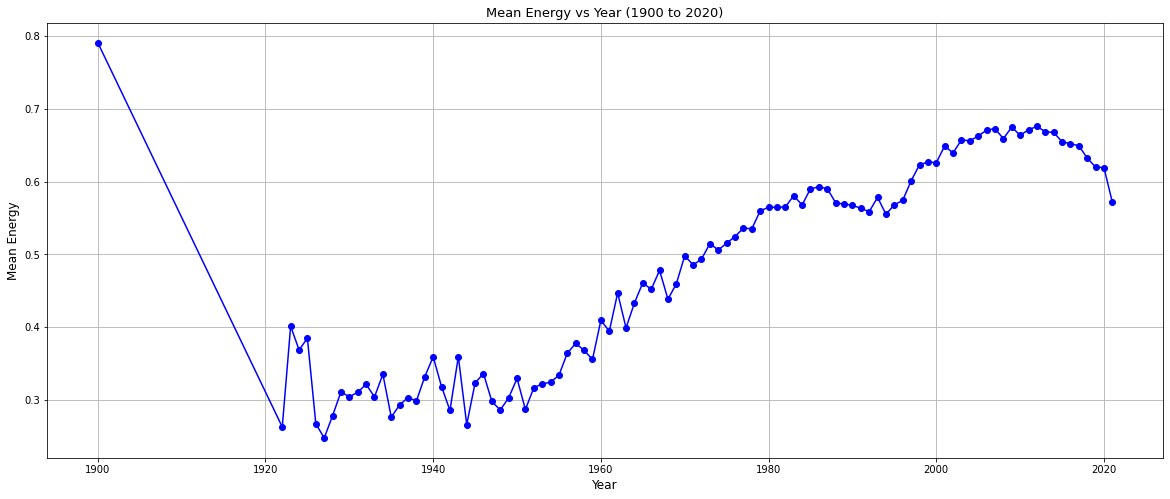

In [ ]:
import matplotlib.pyplot as plt

plt.plot(nframe.release_date, nframe.energy, color='blue', marker='o')
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Mean Energy vs Year (1900 to 2020)', fontsize=13)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Mean Energy',fontsize=12)
plt.grid(True)

As u can see hiegest mean value of enargy is after 1900 is in betweeen 2000 to 2020 let check how mean energy varies in that hiegest mean value year

In [ ]:
new_df = nframe.copy()
new_df = new_df[(new_df['release_date'] >= 2000) & (new_df['release_date'] <= 2020)]

In [ ]:
column = new_df["energy"]
max_value = column.max()
print(max_value)

0.6759164916616722


In [ ]:
new_df.loc[new_df['energy'] == 0.6759164916616722]

,release_date,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
230408,2012,0.675916,-7.002809,0.084567,0.29137,0.069574,0.206594,122.848312


In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [ ]:
new_track_2012= data[(data['release_date'] >= '2012-01-01') & (data['release_date'] <= '2012-12-31')]

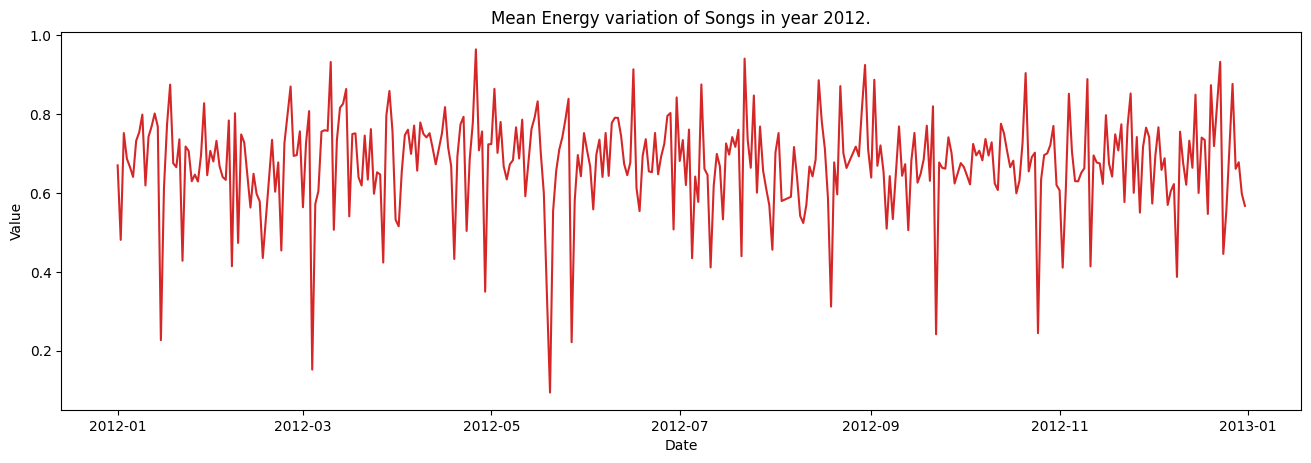

In [ ]:
plot_df(new_track_2012, x=new_track_2012.release_date, y=new_track_2012.energy, title='Mean Energy variation of Songs in year 2012.')    

In [ ]:
adf_test(new_track_2012['energy'])

1. ADF :  -12.404568179719027
2. P-Value :  4.482404352983931e-23
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 350
5. Critical Values :
	 1% :  -3.4491725955218655
	 5% :  -2.8698334971428574
	 10% :  -2.5711883591836733


This shows a Stationarity graph


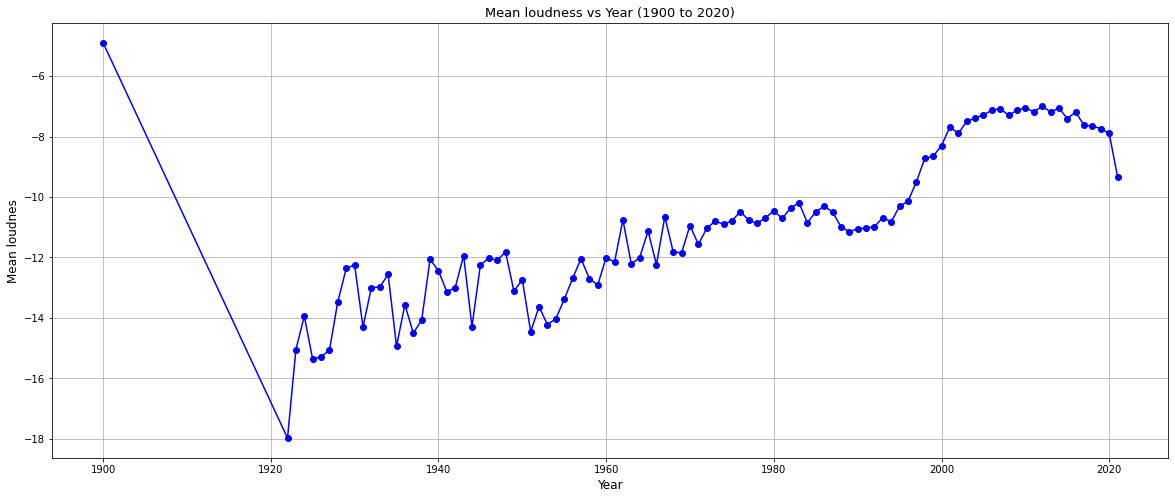

In [ ]:
import matplotlib.pyplot as plt

plt.plot(nframe.release_date, nframe.loudness, color='blue', marker='o')
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Mean loudness vs Year (1900 to 2020)', fontsize=13)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Mean loudnes',fontsize=12)
plt.grid(True)

As u can see hiegest mean value of loudness is after 1900 is in betweeen 2000 to 2020 let check how mean loudness varies in that hiegest mean value year

In [ ]:
column = new_df["loudness"]
max_value = column.max()
print(max_value)

-7.00280939825339


In [ ]:
new_df.loc[new_df['loudness'] == -7.00280939825339]

,release_date,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
230408,2012,0.675916,-7.002809,0.084567,0.29137,0.069574,0.206594,122.848312


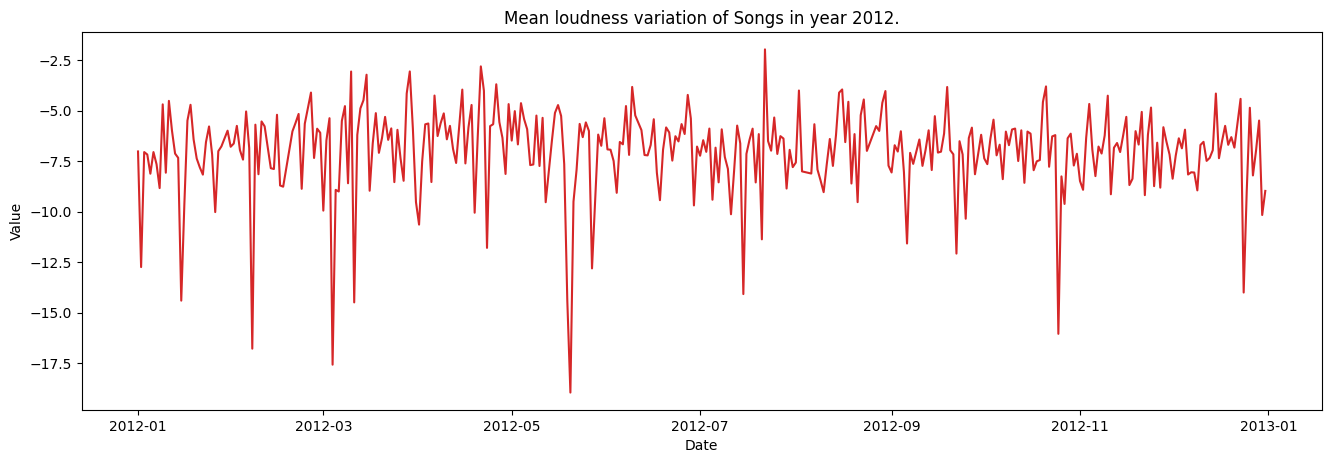

In [ ]:
plot_df(new_track_2012, x=new_track_2012.release_date, y=new_track_2012.loudness, title='Mean loudness variation of Songs in year 2012.') 

In [ ]:
adf_test(new_track_2012['loudness'])

1. ADF :  -17.413230205187627
2. P-Value :  4.8724601998798374e-30
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 352
5. Critical Values :
	 1% :  -3.4490648539347544
	 5% :  -2.8697861692116478
	 10% :  -2.5711631253228306


This shows a seasonal componet

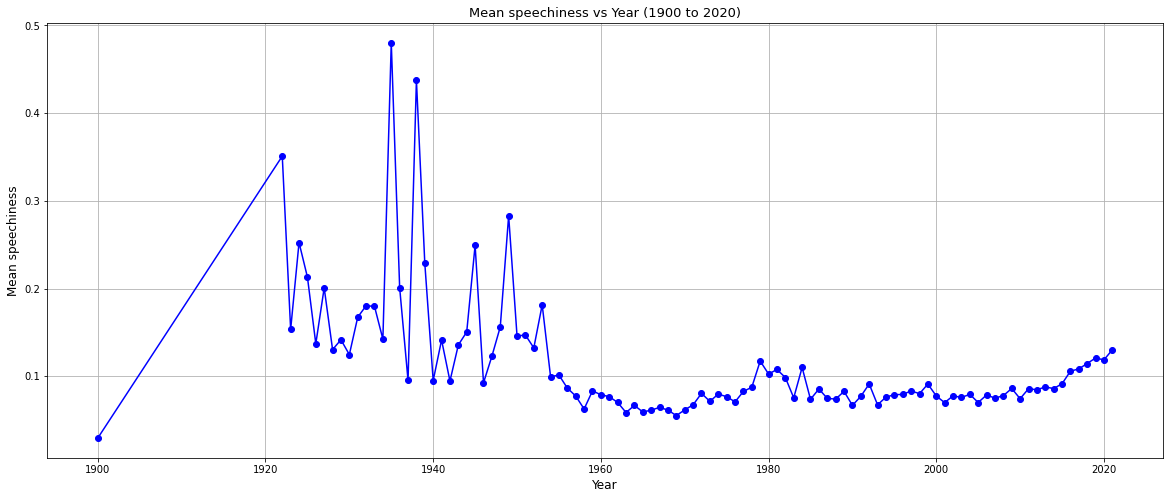

In [ ]:

plt.plot(nframe.release_date, nframe.speechiness, color='blue', marker='o')
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Mean speechiness vs Year (1900 to 2020)', fontsize=13)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Mean speechiness',fontsize=12)
plt.grid(True)

As u can see hiegest mean value of enargy is after 1900 is in betweeen 1920 to 1940 let check how mean energy varies in that hiegest mean value year

In [ ]:
new_df1920_40 = nframe.copy()
new_df1920_40 = new_df1920_40[(new_df1920_40['release_date'] >= 1920) & (new_df1920_40['release_date'] <= 1940)]

In [ ]:
column_speechiness = new_df1920_40["speechiness"]
max_value = column_speechiness.max()
print(max_value)

0.4802971629737135


In [ ]:
new_df1920_40.loc[new_df1920_40['speechiness'] == 0.4802971629737135]

,release_date,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
9800,1935,0.276089,-14.933251,0.480297,0.948808,0.211234,0.182853,93.431902


In [ ]:
new_track_1935= data[(data['release_date'] >= '1935-01-01') & (data['release_date'] <= '1935-12-31')]

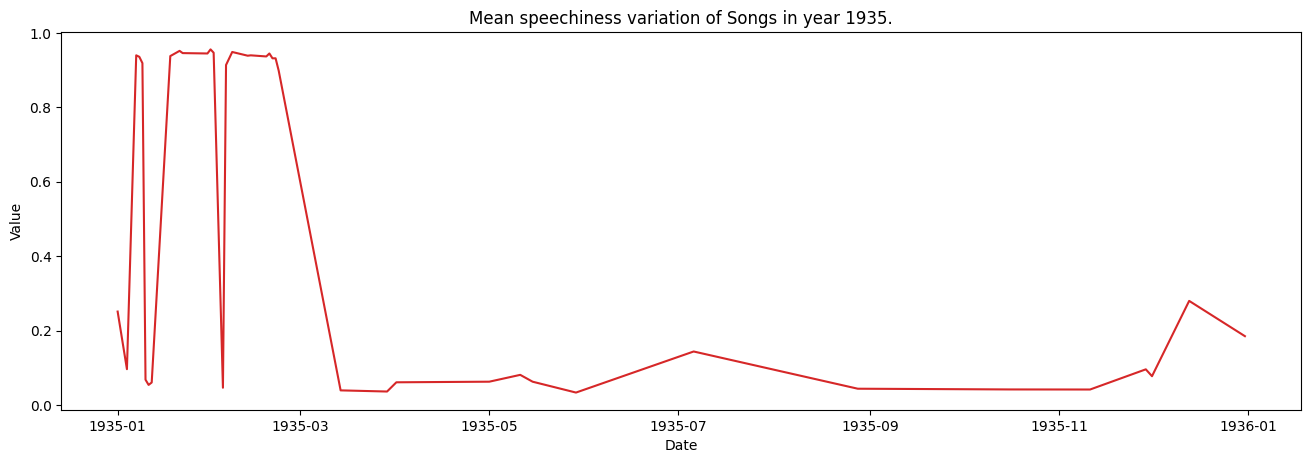

In [ ]:
plot_df(new_track_1935, x=new_track_1935.release_date, y=new_track_1935.speechiness, title='Mean speechiness variation of Songs in year 1935.') 

In [ ]:
adf_test(new_track_1935['speechiness'])

1. ADF :  -2.6436988273770883
2. P-Value :  0.08429768164374285
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 38
5. Critical Values :
	 1% :  -3.6155091011809297
	 5% :  -2.941262357486514
	 10% :  -2.6091995013850418


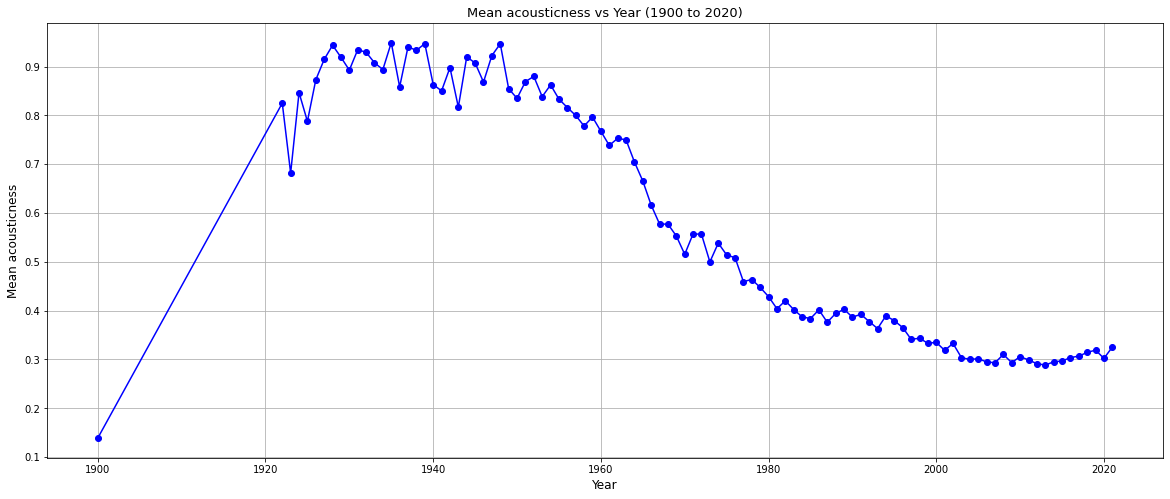

In [ ]:

plt.plot(nframe.release_date, nframe.acousticness, color='blue', marker='o')
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Mean acousticness vs Year (1900 to 2020)', fontsize=13)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Mean acousticness',fontsize=12)
plt.grid(True)

As u can see hiegest mean value of enargy is after 1900 is in betweeen 1920 to 1960 let check how mean energy varies in that hiegest mean value year

In [ ]:
new_df1920_60 = nframe.copy()
new_df1920_60 = new_df1920_60[(new_df1920_60['release_date'] >= 1920) & (new_df1920_60['release_date'] <= 1960)]

In [ ]:
column_speechiness = new_df1920_60["acousticness"]
max_value = column_speechiness.max()
print(max_value)

0.9488075393046176


In [ ]:
new_df1920_60.loc[new_df1920_60['acousticness'] == 0.9488075393046176]

,release_date,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
9800,1935,0.276089,-14.933251,0.480297,0.948808,0.211234,0.182853,93.431902


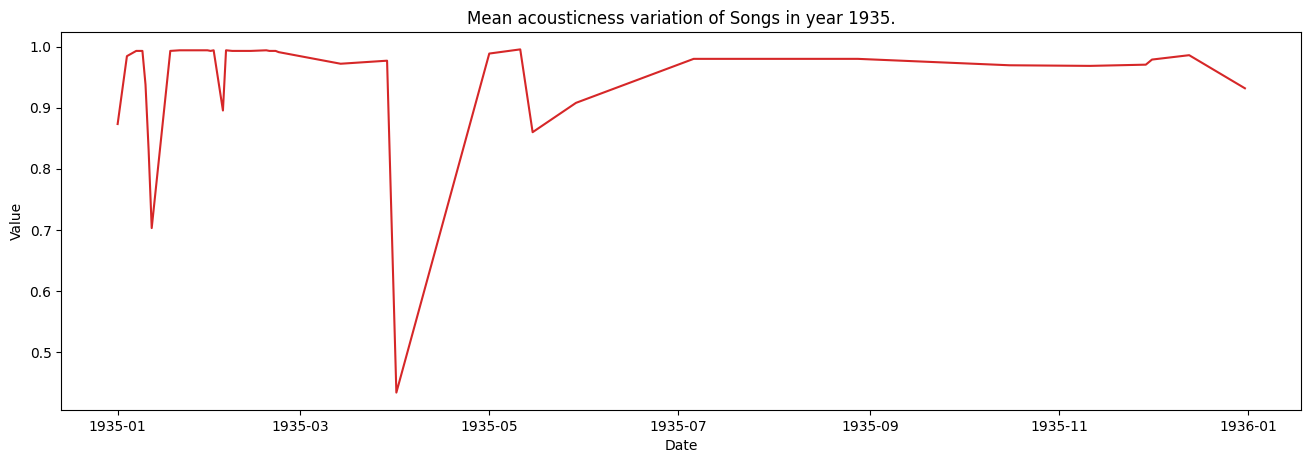

In [ ]:
plot_df(new_track_1935, x=new_track_1935.release_date, y=new_track_1935.acousticness, title='Mean acousticness variation of Songs in year 1935.') 

In [ ]:
adf_test(new_track_1935['acousticness'])

1. ADF :  -5.8529268477129035
2. P-Value :  3.5544180147014064e-07
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 38
5. Critical Values :
	 1% :  -3.6155091011809297
	 5% :  -2.941262357486514
	 10% :  -2.6091995013850418


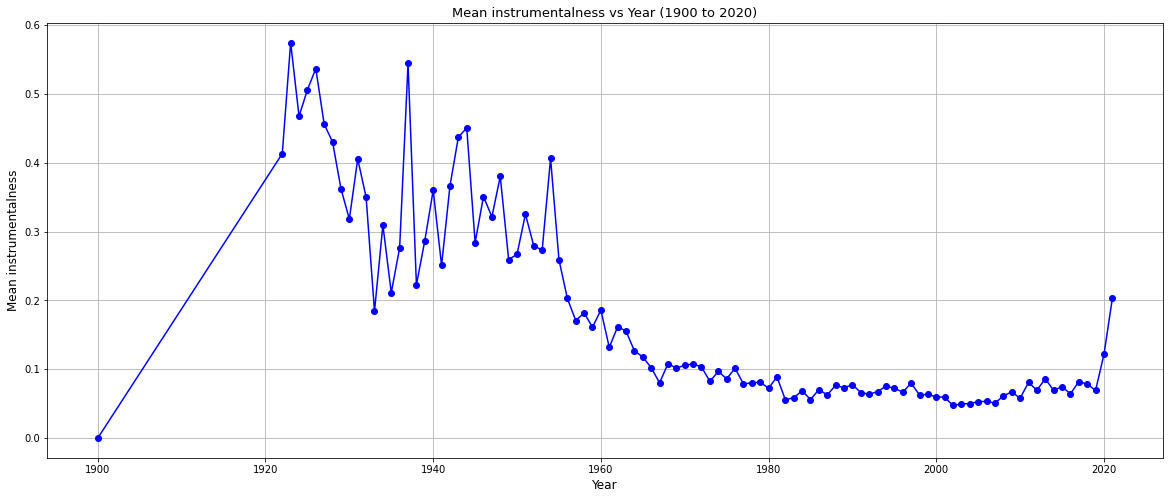

In [ ]:
plt.plot(nframe.release_date, nframe.instrumentalness, color='blue', marker='o')
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Mean instrumentalness vs Year (1900 to 2020)', fontsize=13)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Mean instrumentalness',fontsize=12)
plt.grid(True)

As u can see hiegest mean value of enargy is after 1900 is in betweeen 1920 to 1960 let check how mean energy varies in that hiegest mean value year

In [ ]:
column_speechiness = new_df1920_40["instrumentalness"]
max_value = column_speechiness.max()
print(max_value)

0.5744941495622


In [ ]:
new_df1920_40.loc[new_df1920_40['instrumentalness'] == 0.5744941495622]

,release_date,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
132441,1923,0.401259,-15.046069,0.153321,0.681716,0.574494,0.257605,105.243024


In [ ]:
new_track_1923= data[(data['release_date'] >= '1923-01-01') & (data['release_date'] <= '1923-12-31')]

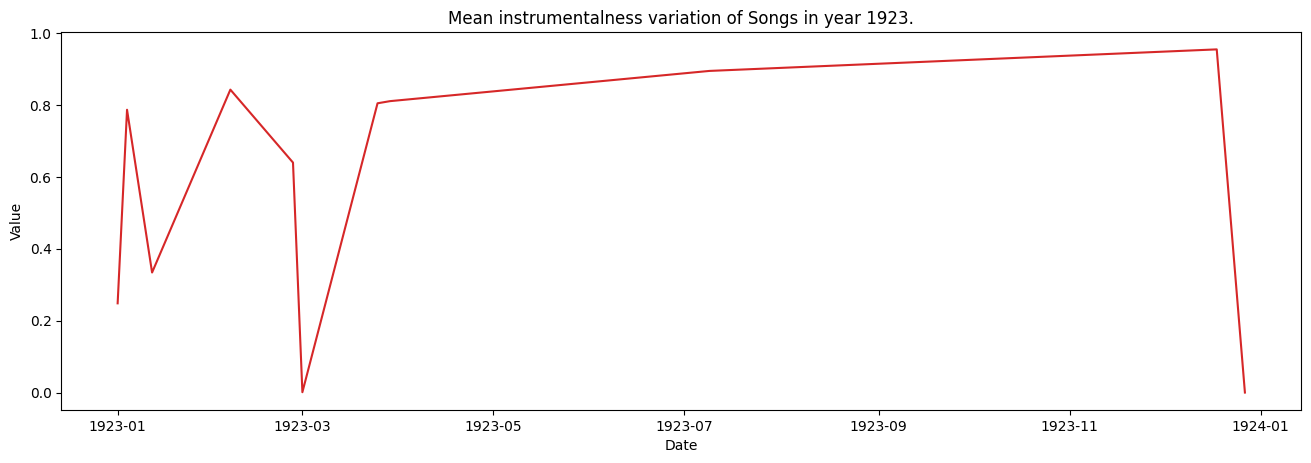

In [ ]:
plot_df(new_track_1923, x=new_track_1923.release_date, y=new_track_1923.instrumentalness, title='Mean instrumentalness variation of Songs in year 1923.') 

In [ ]:
adf_test(new_track_1923['instrumentalness'])

1. ADF :  -2.7746325418342197
2. P-Value :  0.06198968773525048
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 7
5. Critical Values :
	 1% :  -4.9386902332361515
	 5% :  -3.477582857142857
	 10% :  -2.8438679591836733


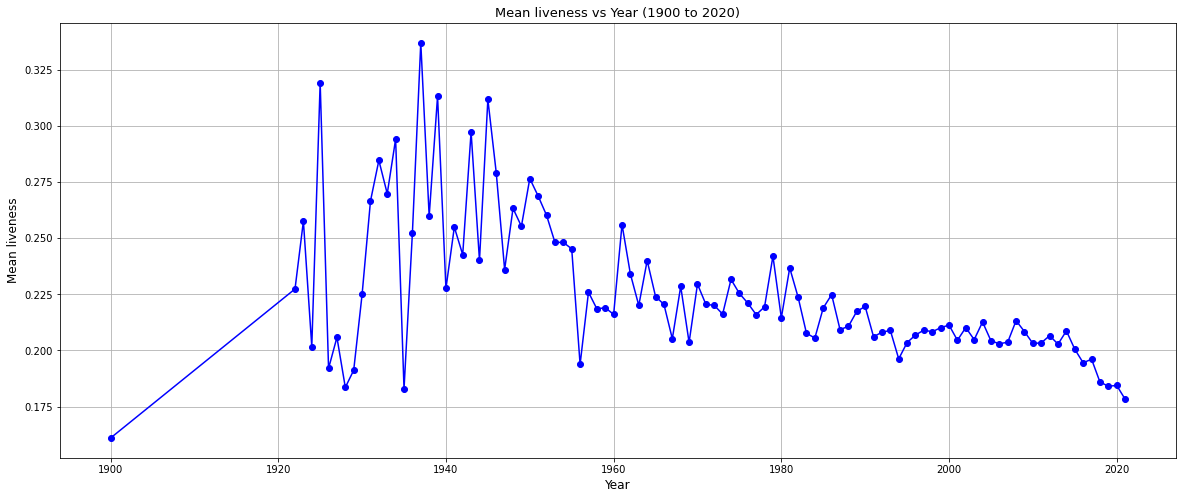

In [ ]:
plt.plot(nframe.release_date, nframe.liveness, color='blue', marker='o')
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Mean liveness vs Year (1900 to 2020)', fontsize=13)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Mean liveness',fontsize=12)
plt.grid(True)

As u can see hiegest mean value of enargy is after 1900 is in betweeen 1920 to 1940 let check how mean energy varies in that hiegest mean value year

In [ ]:
column_liveness = new_df1920_40["liveness"]
max_value = column_liveness.max()
print(max_value)

0.33705935464024395


In [ ]:
new_df1920_40.loc[new_df1920_40['liveness'] == 0.33705935464024395]

,release_date,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
11499,1937,0.303104,-14.503574,0.095302,0.94048,0.544322,0.337059,109.14779


In [ ]:
new_track_1937 = data[(data['release_date'] >= '1937-01-01') & (data['release_date'] <= '1937-12-31')]

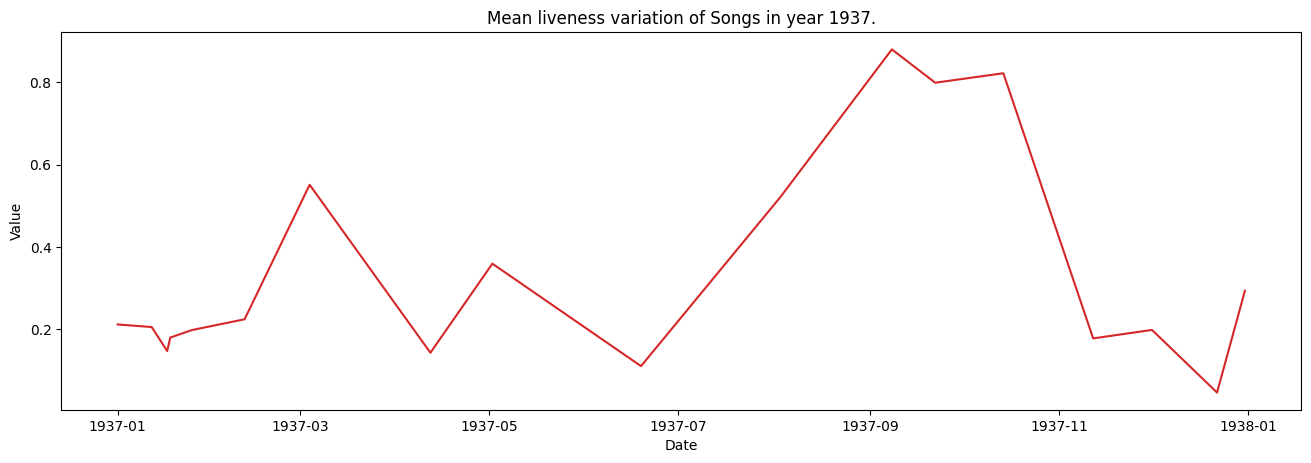

In [ ]:
plot_df(new_track_1937, x=new_track_1937.release_date, y=new_track_1937.liveness, title='Mean liveness variation of Songs in year 1937.') 

In [ ]:
adf_test(new_track_1937['liveness'])

1. ADF :  -0.261278702363987
2. P-Value :  0.9308122070074111
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 10
5. Critical Values :
	 1% :  -4.331573
	 5% :  -3.23295
	 10% :  -2.7487


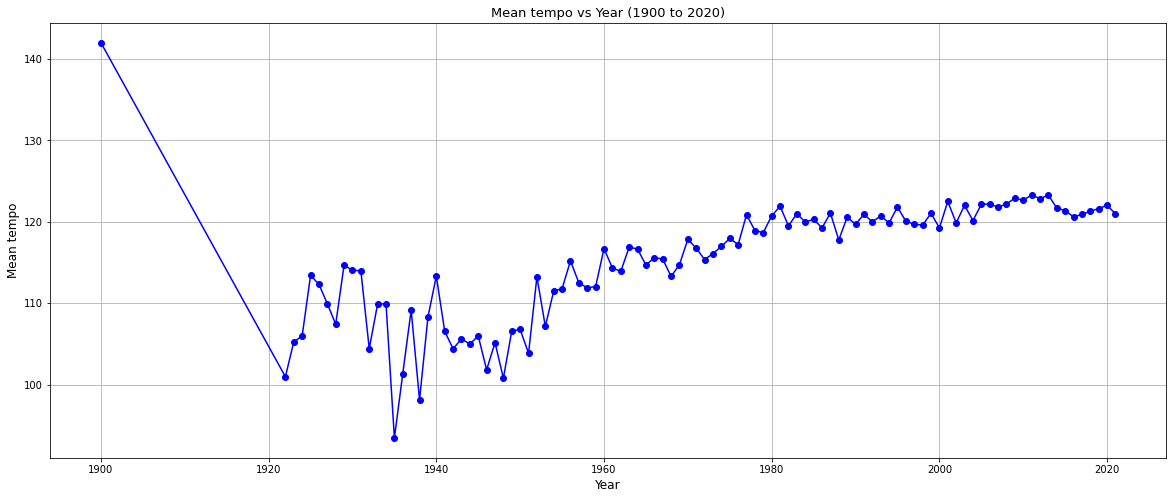

In [ ]:
plt.plot(nframe.release_date, nframe.tempo, color='blue', marker='o')
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Mean tempo vs Year (1900 to 2020)', fontsize=13)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Mean tempo',fontsize=12)
plt.grid(True)

As u can see hiegest mean value of tempo is after 1900 is in betweeen 2000 to 2020 let check how mean tempo varies in that hiegest mean value year

In [ ]:
column_tempo = new_df["tempo"]
max_value = column_tempo.max()
print(max_value)

123.2778390337746


In [ ]:
new_df.loc[new_df['tempo'] == 123.2778390337746]

,release_date,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
504595,2011,0.671211,-7.180706,0.085703,0.298886,0.080713,0.203369,123.277839


In [ ]:
new_track_2011= data[(data['release_date'] >= '2011-01-01') & (data['release_date'] <= '2011-12-31')]

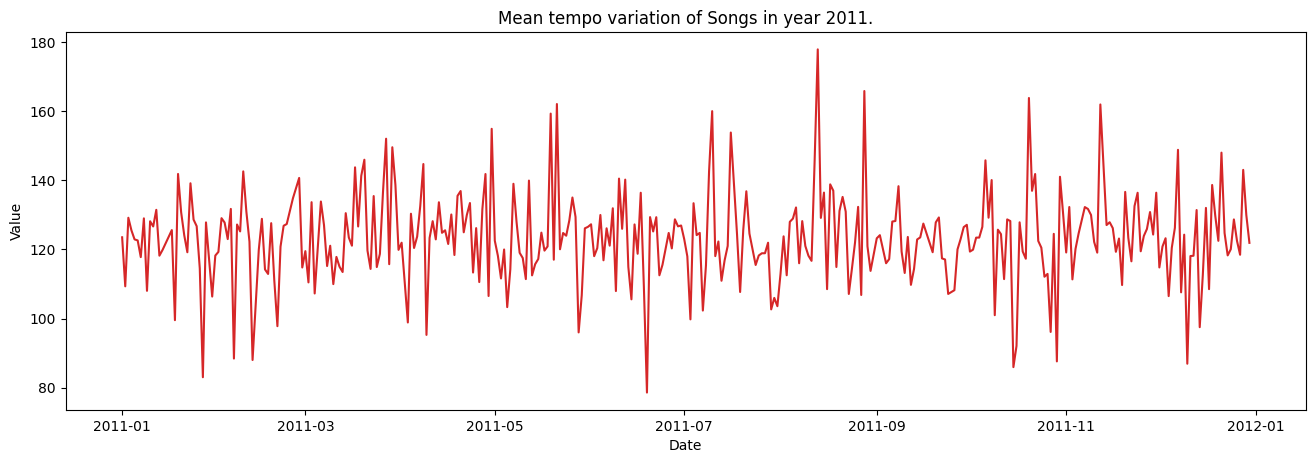

In [ ]:
plot_df(new_track_2011, x=new_track_2011.release_date, y=new_track_2011.tempo, title='Mean tempo variation of Songs in year 2011.') 

In [ ]:
adf_test(new_track_2011['tempo'])

1. ADF :  -18.147415533307903
2. P-Value :  2.4812592076772166e-30
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 348
5. Critical Values :
	 1% :  -3.4492815848836296
	 5% :  -2.8698813715275406
	 10% :  -2.5712138845950587


# Classifcation 

In [ ]:
artist_data.head(5)

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.5901111111111111,0.4672222222222222,250318.5555555556,0.3940033333333333,0.011399851111111107,0.2908333333333333,-14.448,0.21038888888888888,117.51811111111112,0.3895,38.333333333333336,5,1,9
8,"['comedy rock', 'comic', 'parody']","""Weird Al"" Yankovic",0.1731450819672131,0.6627868852459013,218948.19672131148,0.6953934426229511,4.980262295081966e-05,0.16110163934426228,-9.768704918032787,0.08453606557377047,133.03118032786878,0.7513442622950824,34.22950819672131,9,1,122
9,"['emo rap', 'florida rap', 'sad rap', 'undergr...",$NOT,0.5444666666666668,0.7898,137910.46666666667,0.5329333333333333,0.023062583333333327,0.1803,-9.14926666666667,0.29368666666666665,112.34479999999998,0.4807,67.53333333333333,1,1,15
10,"['dark trap', 'meme rap']",$atori Zoom,0.239,0.883,141519.0,0.625,0.0,0.0765,-4.098,0.245,126.677,0.871,67.0,6,1,2
12,"['asian american hip hop', 'cali rap', 'west c...",$tupid Young,0.1481,0.8540000000000001,190572.0,0.6829999999999999,2.075e-06,0.1885,-6.997000000000001,0.221,100.7245,0.6255000000000001,57.5,1,1,2


In [ ]:
new_artist_data = artist_data[['genres','liveness','mode','danceability','popularity']]
new_artist_data.head(5)

,genres,liveness,mode,danceability,popularity
0,['show tunes'],0.2908333333333333,1,0.4672222222222222,38.333333333333336
8,"['comedy rock', 'comic', 'parody']",0.16110163934426228,1,0.6627868852459013,34.22950819672131
9,"['emo rap', 'florida rap', 'sad rap', 'undergr...",0.1803,1,0.7898,67.53333333333333
10,"['dark trap', 'meme rap']",0.0765,1,0.883,67.0
12,"['asian american hip hop', 'cali rap', 'west c...",0.1885,1,0.8540000000000001,57.5


In [ ]:
def convert_levels(value):
    
      if value < 0.3333333333333333 :
        level = 'Low'
      elif value <=  0.6666666666666667 and value >  0.3333333333333333:
        level = 'Medium'
      else :
        level = 'High'
      
      return level

In [ ]:
def convert_level100(grade):
    
      if grade < 33.33333333333333 :
        grade = 'Low'
      elif grade <=  66.66666666666667 and grade >  33.33333333333333:
        grade = 'Medium'
      else :
        grade = 'High'
      
      return grade

In [ ]:
frame = new_artist_data.copy()

frame.danceability = frame.danceability.astype(float)
frame.liveness = frame.liveness.astype(float)
frame.popularity = frame.popularity.astype(float)


frame.danceability = frame.danceability.apply(lambda x: convert_levels(x) )
frame.liveness = frame.liveness.apply(lambda x: convert_levels(x) )
frame.popularity = frame.popularity.apply(lambda x: convert_level100(x) )

frame.danceability = frame.danceability.astype(str)
frame.liveness = frame.liveness.astype(str)
frame.popularity = frame.popularity.astype(str)

frame.head(5)

,genres,liveness,mode,danceability,popularity
0,['show tunes'],Low,1,Medium,Medium
8,"['comedy rock', 'comic', 'parody']",Low,1,Medium,Medium
9,"['emo rap', 'florida rap', 'sad rap', 'undergr...",Low,1,High,High
10,"['dark trap', 'meme rap']",Low,1,High,High
12,"['asian american hip hop', 'cali rap', 'west c...",Low,1,High,Medium


In [ ]:
frame['mode'].value_counts()

1    14364
0     4459
Name: mode, dtype: int64

In [ ]:
frame['danceability'].value_counts()

Medium    11440
High       5254
Low        2129
Name: danceability, dtype: int64

In [ ]:
frame['popularity'].value_counts()

Medium    12746
Low        5062
High       1015
Name: popularity, dtype: int64

In [ ]:
from ast import literal_eval

frame['genres'] = frame['genres'].apply(literal_eval) #convert to list type

In [ ]:
split_frame = frame.explode('genres')

In [ ]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18823 entries, 0 to 28679
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   genres        18823 non-null  object
 1   artists       18823 non-null  object
 2   liveness      18823 non-null  object
 3   mode          18823 non-null  object
 4   danceability  18823 non-null  object
 5   popularity    18823 non-null  object
dtypes: object(6)
memory usage: 1.0+ MB


In [ ]:
split_frame.head(5)

,genres,liveness,mode,danceability,popularity
0,show tunes,Low,1,Medium,Medium
8,comedy rock,Low,1,Medium,Medium
8,comic,Low,1,Medium,Medium
8,parody,Low,1,Medium,Medium
9,emo rap,Low,1,High,High


In [ ]:
df = spark.createDataFrame(split_frame)

In [ ]:
from pyspark.ml.feature import StringIndexer

indexers = [StringIndexer(inputCol="genres", outputCol = "genres_index"),
 StringIndexer(inputCol="liveness", outputCol = "liveness_index"),
 StringIndexer(inputCol="danceability", outputCol = "danceability_index"),
 StringIndexer(inputCol="mode", outputCol = "mode_index"),
 StringIndexer(inputCol="popularity", outputCol = "label")]


In [ ]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=indexers)
#Fitting a model to the input dataset.
indexed_df = pipeline.fit(df).transform(df)
indexed_df.show(5,False) 

+-----------+--------+----+------------+----------+------------+--------------+------------------+----------+-----+
|genres     |liveness|mode|danceability|popularity|genres_index|liveness_index|danceability_index|mode_index|label|
+-----------+--------+----+------------+----------+------------+--------------+------------------+----------+-----+
|show tunes |Low     |1   |Medium      |Medium    |54.0        |0.0           |0.0               |0.0       |0.0  |
|comedy rock|Low     |1   |Medium      |Medium    |1703.0      |0.0           |0.0               |0.0       |0.0  |
|comic      |Low     |1   |Medium      |Medium    |143.0       |0.0           |0.0               |0.0       |0.0  |
|parody     |Low     |1   |Medium      |Medium    |1047.0      |0.0           |0.0               |0.0       |0.0  |
|emo rap    |Low     |1   |High        |High      |141.0       |0.0           |1.0               |0.0       |2.0  |
+-----------+--------+----+------------+----------+------------+--------

In [ ]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols = ["genres_index", "liveness_index", "danceability_index", "mode_index"],outputCol = "features")
vindexed_df = vectorAssembler.transform(indexed_df)
vindexed_df.show(5, False)

+-----------+--------+----+------------+----------+------------+--------------+------------------+----------+-----+-------------------+
|genres     |liveness|mode|danceability|popularity|genres_index|liveness_index|danceability_index|mode_index|label|features           |
+-----------+--------+----+------------+----------+------------+--------------+------------------+----------+-----+-------------------+
|show tunes |Low     |1   |Medium      |Medium    |54.0        |0.0           |0.0               |0.0       |0.0  |(4,[0],[54.0])     |
|comedy rock|Low     |1   |Medium      |Medium    |1703.0      |0.0           |0.0               |0.0       |0.0  |(4,[0],[1703.0])   |
|comic      |Low     |1   |Medium      |Medium    |143.0       |0.0           |0.0               |0.0       |0.0  |(4,[0],[143.0])    |
|parody     |Low     |1   |Medium      |Medium    |1047.0      |0.0           |0.0               |0.0       |0.0  |(4,[0],[1047.0])   |
|emo rap    |Low     |1   |High        |High    

In [ ]:
splits = vindexed_df.randomSplit([0.6,0.4], 42) 
train_df = splits[0]
test_df = splits[1]

In [ ]:
from pyspark.ml.classification import NaiveBayes

nb = NaiveBayes(modelType="multinomial")
# train the model
nbmodel = nb.fit(train_df)
# select example rows to display.
predictions_df = nbmodel.transform(test_df)
predictions_df.show(5, True)


+--------------------+--------+----+------------+----------+------------+--------------+------------------+----------+-----+--------------------+--------------------+--------------------+----------+
|              genres|liveness|mode|danceability|popularity|genres_index|liveness_index|danceability_index|mode_index|label|            features|       rawPrediction|         probability|prediction|
+--------------------+--------+----+------------+----------+------------+--------------+------------------+----------+-----+--------------------+--------------------+--------------------+----------+
|21st century clas...|     Low|   1|         Low|    Medium|      1644.0|           0.0|               2.0|       0.0|  0.0|[1644.0,0.0,2.0,0.0]|[-17.419594630955...|[0.64440497928298...|       0.0|
|               8-bit|     Low|   1|        High|    Medium|      2262.0|           0.0|               1.0|       0.0|  0.0|[2262.0,0.0,1.0,0.0]|[-12.262488481477...|[0.45854430889293...|       1.0|
|    

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluatorAccuracy = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluatorAccuracy.evaluate(predictions_df)

evaluatorf1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1 = evaluatorf1.evaluate(predictions_df)

evaluatorPrecision = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluatorPrecision.evaluate(predictions_df)

evaluatorRecall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
recall = evaluatorRecall.evaluate(predictions_df)

print("Test set accuracy = " + str(accuracy))
print("Test set f1 measure = " + str(f1))
print("Test set precision = " + str(precision))
print("Test set recall = " + str(recall))

Test set accuracy = 0.7144404052904324
Test set f1 measure = 0.6117950515867921
Test set precision = 0.5889440037487235
Test set recall = 0.7144404052904324
